In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import numpy as np
import os
sns.set_context("talk")

## 1. Visualise changes over layers for PIE

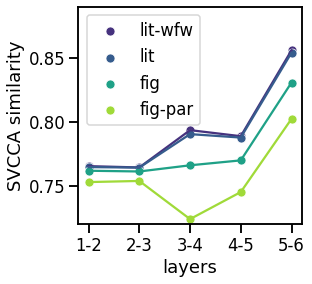

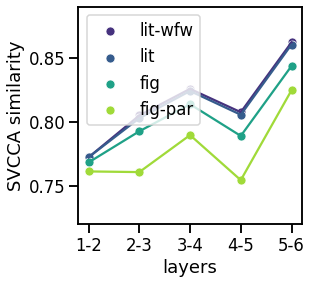

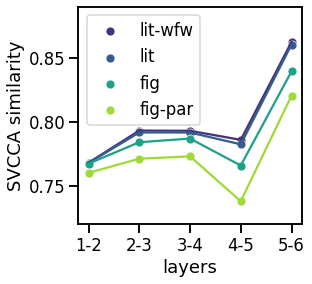

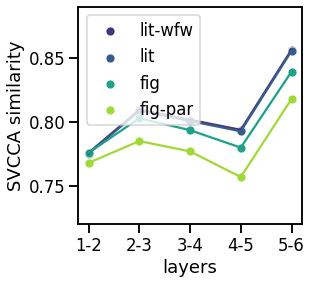

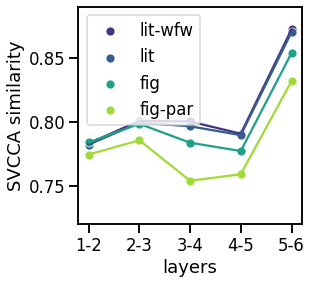

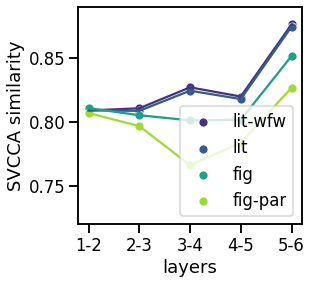

In [13]:
def plot(label, y, color, alpha=1):
    sns.scatterplot(x=[1, 2, 3, 4, 5], y=y, color=color, alpha=alpha, label=label)
    ax = sns.lineplot(x=[1, 2, 3, 4, 5], y=y, color=color, alpha=alpha)
    return ax 

for language in ["nl", "de", "sv", "da", "fr", "es"]:
    #os.mkdir(f"figures/{language}")
    colours = sns.color_palette("viridis", 6)
    plt.figure(figsize=(4, 4))
    similarities = pickle.load(open(f"data/{language}/over_layers.pickle", "rb"))
    ax = plot("lit-wfw", similarities[(1, "literal", "word-by-word")][1:], colours[0])
    ax = plot("lit", similarities[(1, "literal")][1:], colours[1])
    ax = plot("fig", similarities[(1, "figurative")][1:], colours[3])
    ax = plot("fig-par", similarities[(1, "figurative", "paraphrase")][1:], colours[5])

    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_xticklabels(["1-2", "2-3", "3-4", "4-5", "5-6"])
#     plt.text(5.4, 0.875, "lit-wfw")
#     plt.text(5.4, 0.863, "lit")
#     plt.text(5.4, 0.84, "fig")
#     plt.text(5.4, 0.81, "fig-par")

    plt.xlabel("layers")
    plt.ylabel(r"SVCCA similarity")
    plt.ylim(0.72, 0.89)
    plt.savefig(f"figures/{language}/over_layers_PIE.pdf", bbox_inches="tight")

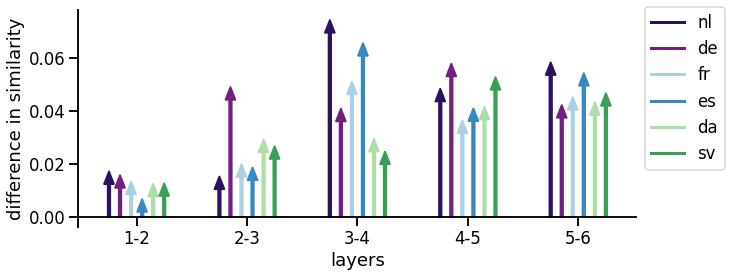

In [10]:
from matplotlib.lines import Line2D
sns.set_context("talk")

languages = ['nl', 'de', 'fr', 'es', 'da', 'sv']

language = "fr"
language_to_colour = {
    l: c for l, c in \
    zip(languages, sns.color_palette("magma", 5)[:2] + sns.color_palette("Blues", 2) + sns.color_palette("Greens", 2))}

fig, ax = plt.subplots(figsize=(10, 4))
for i, language in enumerate(languages):
    similarities = pickle.load(open(f"data/{language}/over_layers.pickle", "rb"))
    diffs = np.array(similarities[(1, "literal", "word-by-word")][1:]) - \
            np.array(similarities[(1, "figurative", "paraphrase")][1:])
    x_coords = []
    for k in range(len(diffs)):
        x_coords.append(k * (len(languages) + 2) + (i/1.25))

    for j, d in enumerate(diffs):
        ax.arrow(x_coords[j], 0 , 0, # x start point
                 d, # change in y
                 head_width=0.75, # arrow head width
                 head_length=0.005, # arrow head length
                 width=0.2, # arrow stem width
                 fc=language_to_colour[language], #arrow fill color
                 ec=language_to_colour[language], label=language) # arrow edge color

custom_lines = [Line2D([0], [0], color=language_to_colour[l], lw=3) for l in languages]
ax.legend(custom_lines, languages, bbox_to_anchor=(1, 1.05))

sns.despine(top=True, right=True)
ax.spines['bottom'].set_position('zero')
ax.set_xticks([2, 10, 18, 26, 34])
ax.set_xticklabels(["1-2", "2-3", "3-4", "4-5", "5-6"])
plt.ylabel("difference in similarity")
plt.xlabel("layers")
plt.savefig("figures/over_layers_languages.pdf", bbox_inches="tight")
plt.show()

## 2. Visualise changes over layers for non-PIEs

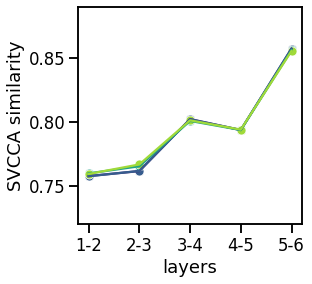

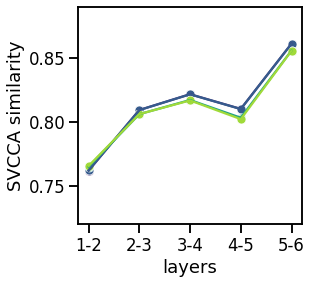

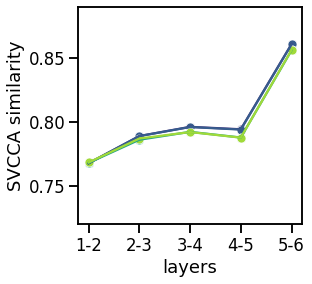

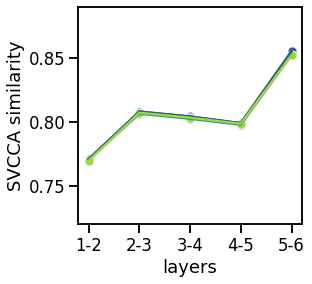

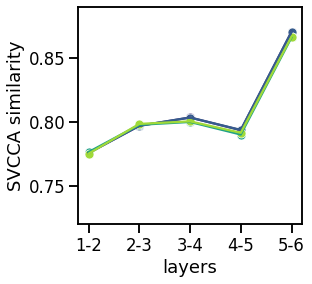

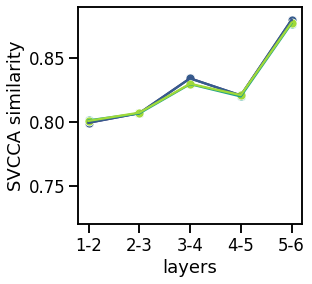

In [15]:
for language in ["nl", "de", "sv", "da", "fr", "es"]:
    similarities = pickle.load(open(f"data/{language}/over_layers.pickle", "rb"))
    def plot(x, y, color, alpha=1):
        sns.scatterplot(x=[1, 2, 3, 4, 5], y=y, color=color, alpha=alpha)
        ax = sns.lineplot(x=[1, 2, 3, 4, 5], y=y, color=color, alpha=alpha)
        return ax 

    colours = sns.color_palette("viridis", 6)
    plt.figure(figsize=(4, 4))
    ax = plot("lit-wbw", similarities[(0, "literal", "word-by-word")][1:], colours[0])
    ax = plot("lit-wbw", similarities[(0, "literal")][1:], colours[1])
    ax = plot("lit-wbw", similarities[(0, "figurative")][1:], colours[3])
    ax = plot("lit-wbw", similarities[(0, "figurative", "paraphrase")][1:], colours[5])

    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_xticklabels(["1-2", "2-3", "3-4", "4-5", "5-6"])
    plt.xlabel("layers")
    plt.ylabel(r"SVCCA similarity")
    plt.ylim(0.72, 0.89)
    plt.savefig(f"figures/{language}/over_layers_non_PIE.pdf", bbox_inches="tight")

## 3. Visualise results of masking

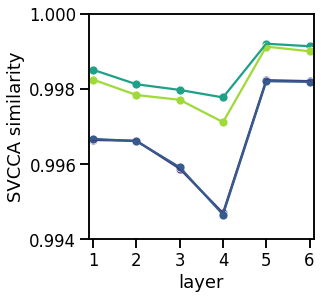

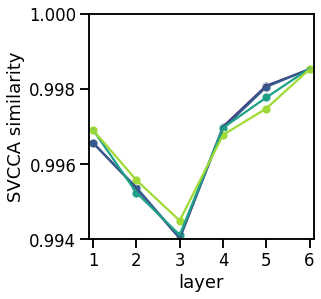

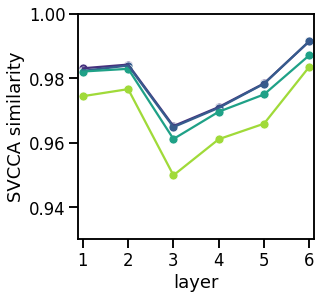

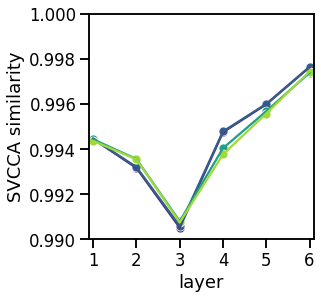

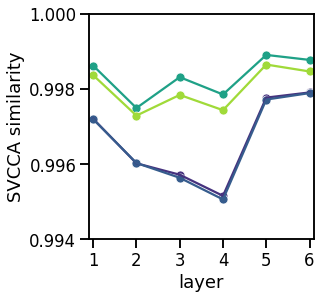

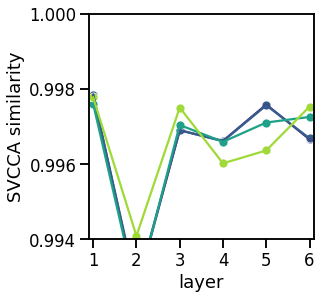

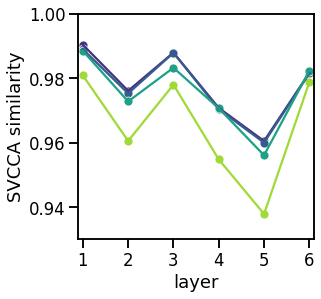

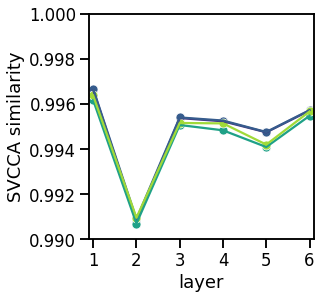

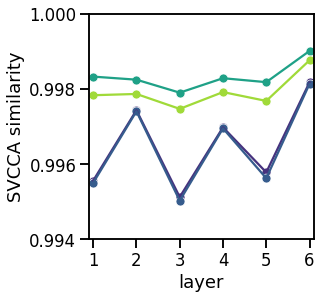

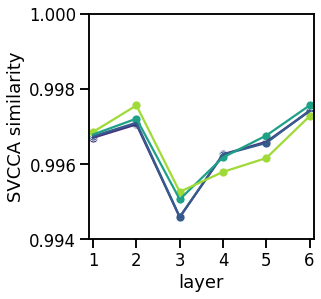

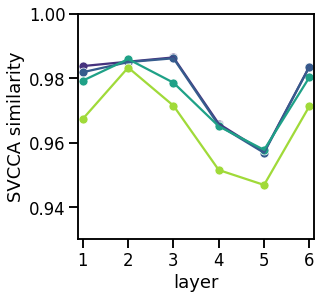

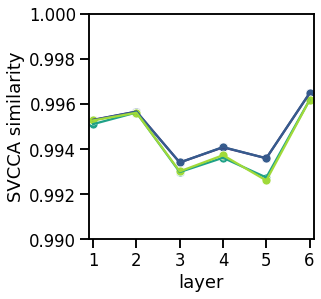

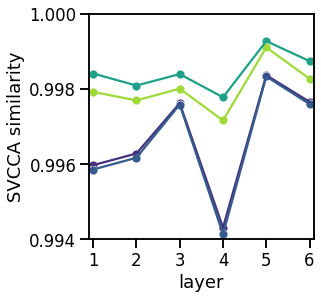

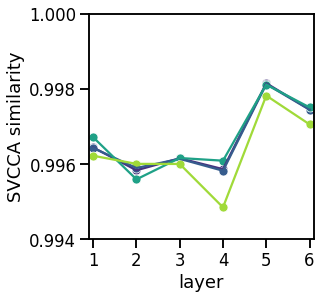

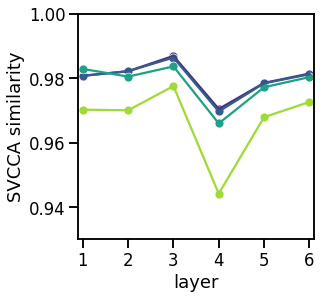

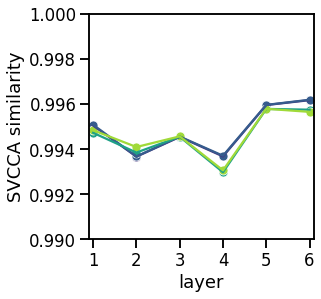

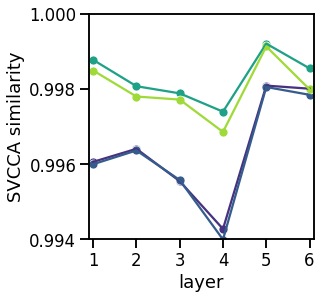

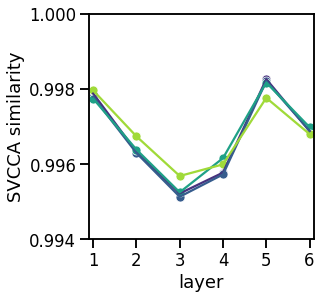

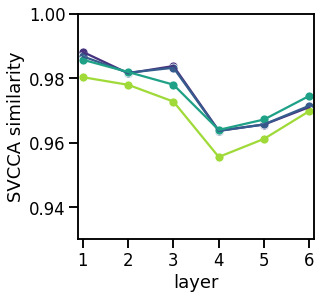

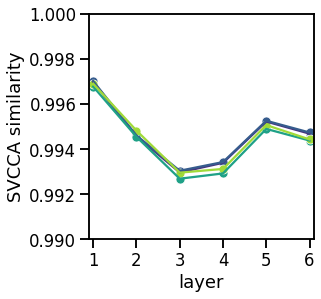

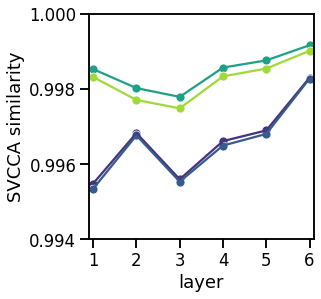

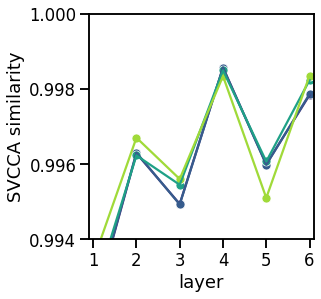

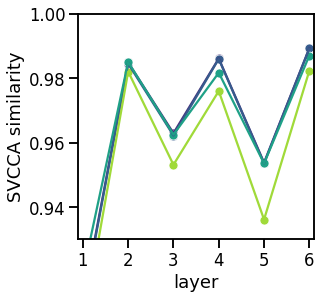

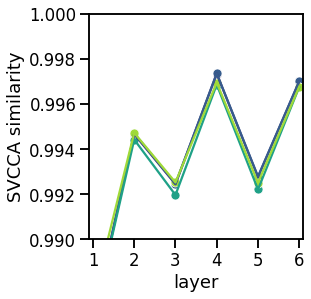

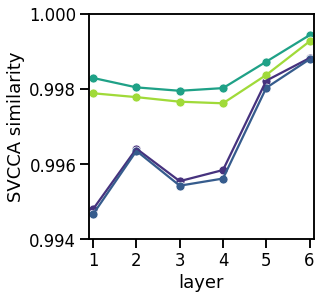

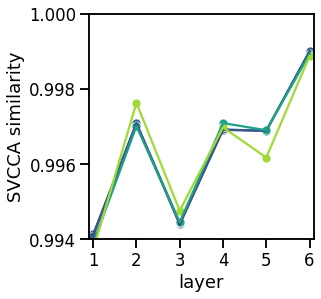

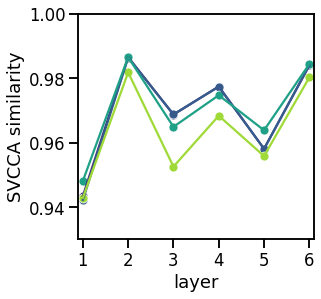

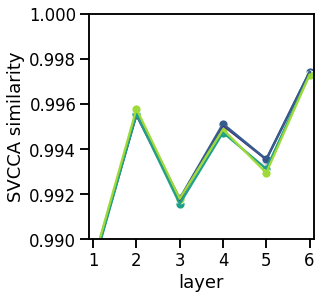

In [4]:
for language in ["nl", "de", "sv", "da", "fr", "es", "it"]:
    for setup, mini in [("con2idi", 0.994), ("idi2con", 0.994), ("idi2idi", 0.93), ("con2con", 0.99)]:
        data = pickle.load(open(f"data/{language}/svcca_{setup}.pickle", 'rb'))
        literal = data["literal"]
        figurative = data["figurative"]
        literal_word_by_word = data[("literal", "word-by-word")]
        figurative_paraphrase = data[("figurative", "paraphrase")]

        def plot(matrix, colour, label=None, ax=None, x_values=list(range(0, 6)), alpha=-1):
            sns.scatterplot(x=x_values, y=matrix, color=colour, ax=ax, alpha=alpha if alpha != -1 else 1)
            sns.lineplot(x=x_values, y=matrix, color=colour, ax=ax, alpha=alpha if alpha != -1 else 1)

        fig, (ax1) = plt.subplots(1, 1, figsize=(4.8, 4.5))
        colours = sns.color_palette("viridis", 6)
        sns.set_context("talk")
        plot(literal_word_by_word, colours[0], ax=ax1, label="lit-wbw")
        plot(literal, colours[1], ax=ax1, label="lit")
        plot(figurative, colours[3], ax=ax1, label="fig")
        plot(figurative_paraphrase, colours[5], ax=ax1, label="fig-par")

        ax1.set_xticks([0, 1, 2, 3, 4, 5])
        ax1.set_xticklabels([1, 2, 3, 4, 5, 6])
        ax1.set_xlim(-0.1, 5.1)
        ax1.set_xlabel("layer")
        ax1.set_ylabel("SVCCA similarity")

        #sns.despine(top=True, right=True)
        plt.gca().set_ylim(top=1)
        fig.tight_layout()
        #legend = plt.legend(bbox_to_anchor=(0.95, 1), framealpha=0.0)

        plt.ylim(mini, 1.0)
        #ax1.set_yticks([0.991, 0.995, 0.997, 1.0])
        plt.savefig(f"figures/{language}/influence_{setup}.pdf", bbox_inches="tight")
        plt.show()

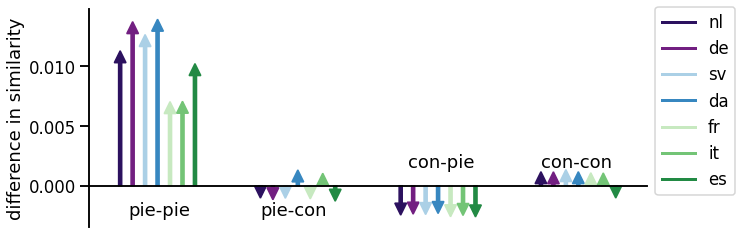

In [8]:
from matplotlib.lines import Line2D
sns.set_context("talk")


fig, ax = plt.subplots(figsize=(10, 4))
languages = ['nl', 'de', 'sv', 'da', 'fr', 'it', 'es']

language_to_colour = {
    l: c for l, c in \
    zip(languages, sns.color_palette("magma", 5)[:2] + sns.color_palette("Blues", 2) + sns.color_palette("Greens", 3))}

for s, setup in enumerate(["idi2idi", "idi2con", "con2idi", "con2con"]):
    for i, language in enumerate(languages):

        data = pickle.load(open(f"data/{languages[i]}/svcca_{setup}.pickle", 'rb'))
        literal = data["literal"]
        figurative = data["figurative"]
        literal_word_by_word = data[("literal", "word-by-word")]
        figurative_paraphrase = data[("figurative", "paraphrase")]
        diffs = np.array(literal_word_by_word) - np.array(figurative_paraphrase)

        x_coords = s * (len(languages) + 2) + (i/1.25)

        ax.arrow(x_coords, 0 , 0, # x start point
                 np.mean(diffs), # change in y
                     head_width=0.75, # arrow head width
                     head_length=0.001, # arrow head length
                     width=0.2, # arrow stem width
                     fc=language_to_colour[language], #arrow fill color
                     ec=language_to_colour[language], label=language) # arrow edge color

    custom_lines = [Line2D([0], [0], color=language_to_colour[l], lw=3) for l in languages]
    ax.legend(custom_lines, languages, bbox_to_anchor=(1, 1.05))

sns.despine(top=True, right=True)
ax.spines['bottom'].set_position('zero')
ax.set_xticks([])
plt.text(0.5, -0.0025, "pie-pie")
plt.text(9, -0.0025, "pie-con")
plt.text(18.5, 0.0015, "con-pie")
plt.text(27, 0.0015, "con-con")
plt.ylabel("difference in similarity")
plt.savefig("figures/svcca_languages.pdf", bbox_inches="tight")
plt.show()